In [277]:
import numpy as np
import pandas as pd

In [278]:
oringinal = pd.read_csv('train.csv' , index_col='Id')
oringinal_test = pd.read_csv('test.csv', index_col='Id')

In [279]:
test_data = oringinal_test.copy()
train_data = oringinal.copy()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

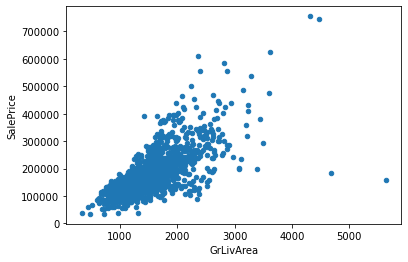

In [280]:
oringinal.plot.scatter(x='GrLivArea' , y='SalePrice')

In [281]:
oringinal["GrLivArea"].sort_values(ascending=False)

Id
1299    5642
524     4676
1183    4476
692     4316
1170    3627
        ... 
529      605
30       520
917      480
1101     438
534      334
Name: GrLivArea, Length: 1460, dtype: int64

In [282]:
train_data = train_data[train_data["GrLivArea"] < 4476]

In [283]:
target = train_data['SalePrice']
train_data=train_data.drop("SalePrice" , axis = 1)

In [284]:
train_test = pd.concat([train_data, test_data])
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [285]:
count_of_nan = train_test.isna().sum().sort_values(ascending=False)
columns_to_delete = count_of_nan[count_of_nan > 200].index

In [286]:
train_test = train_test.drop(columns_to_delete , axis=1)
train_test

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [287]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 1 to 2919
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2916 non-null   int64  
 1   MSZoning       2912 non-null   object 
 2   LotArea        2916 non-null   int64  
 3   Street         2916 non-null   object 
 4   LotShape       2916 non-null   object 
 5   LandContour    2916 non-null   object 
 6   Utilities      2914 non-null   object 
 7   LotConfig      2916 non-null   object 
 8   LandSlope      2916 non-null   object 
 9   Neighborhood   2916 non-null   object 
 10  Condition1     2916 non-null   object 
 11  Condition2     2916 non-null   object 
 12  BldgType       2916 non-null   object 
 13  HouseStyle     2916 non-null   object 
 14  OverallQual    2916 non-null   int64  
 15  OverallCond    2916 non-null   int64  
 16  YearBuilt      2916 non-null   int64  
 17  YearRemodAdd   2916 non-null   int64  
 18  RoofStyl

In [288]:
garage_columns = [i for i in train_test.columns if 'Garage' in i]
garage_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [289]:
garage_df = train_test[garage_columns]
garage_df

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1,Attchd,2003.0,RFn,2.0,548.0,TA,TA
2,Attchd,1976.0,RFn,2.0,460.0,TA,TA
3,Attchd,2001.0,RFn,2.0,608.0,TA,TA
4,Detchd,1998.0,Unf,3.0,642.0,TA,TA
5,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2915,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2916,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2917,Detchd,1960.0,Unf,2.0,576.0,TA,TA


In [290]:
def fill_na_train_test(column, value):
    train_test[column] = train_test[column].fillna(value)



In [291]:
fill_na_train_test("GarageType" , "NA")
fill_na_train_test("GarageFinish" , "NA")
fill_na_train_test("GarageCars" , 0)
fill_na_train_test("GarageArea" , 0)
fill_na_train_test("GarageYrBlt" , 0)
fill_na_train_test("GarageQual" , "NA")
fill_na_train_test("GarageCond" , "NA")



In [292]:
train_test["GarageFinish"] = train_test["GarageFinish"].replace(["Fin" , "RFn" , "Unf" , "NA"], [3 , 2 ,1 , 0])

In [293]:
bstm_columns = [i for i in train_test.columns if 'Bsmt' in i]
bstm_columns

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [294]:
train_test[bstm_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
1,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
2,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
3,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
4,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
5,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2915,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,0.0,0.0
2916,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,0.0,0.0
2917,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,1.0,0.0


In [295]:
train_test[train_test["TotalBsmtSF"] == 0][bstm_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [296]:
fill_na_train_test("BsmtQual" , "NA")
fill_na_train_test("BsmtCond" , "NA")
fill_na_train_test("BsmtExposure" , "NA")
fill_na_train_test("BsmtFinType1" , "NA")
fill_na_train_test("BsmtFinSF1" ,0)
fill_na_train_test("BsmtFinType2" , "NA")
fill_na_train_test("BsmtFinSF2" ,0)
fill_na_train_test("BsmtUnfSF" ,0)
fill_na_train_test("TotalBsmtSF" ,0)
fill_na_train_test("BsmtFullBath" ,0)
fill_na_train_test("BsmtHalfBath" ,0)


In [297]:
train_test["BsmtExposure"] = train_test["BsmtExposure"].replace(["Gd" , "Av" , "Mn" , "NA" , "No"], [3 , 2 ,1 , 0 , 0])
train_test["BsmtFinType1"] = train_test["BsmtFinType1"].replace(["GLQ" , "ALQ" , "BLQ" , "LwQ" , "Unf","No"], [5,4, 3 , 2 ,1 , 0 ])
train_test["BsmtFinType2"] = train_test["BsmtFinType2"].replace(["GLQ" , "ALQ" , "BLQ" , "LwQ" , "Unf","No"], [5,4, 3 , 2 ,1 , 0 ])

In [298]:

train_test["BsmtBath"] = train_test["BsmtFullBath"] + train_test["BsmtHalfBath"] * 0.5
train_test=train_test.drop(["BsmtFullBath" , "BsmtHalfBath"] , axis = 1)




In [299]:
fill_na_train_test("MasVnrType" , "None")
train_test["MasVnrArea"] = train_test["MasVnrArea"].fillna(train_test["MasVnrArea"].median())

In [300]:
train_test.isna().sum().sort_values(ascending=False)



MSZoning        4
Utilities       2
Functional      2
Electrical      1
KitchenQual     1
               ..
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
BsmtBath        0
Length: 72, dtype: int64

In [301]:
train_test["MSZoning"] = train_test["MSZoning"].fillna(train_test["MSZoning"].mode()[0])
train_test["Utilities"] = train_test["Utilities"].fillna(train_test["Utilities"].mode()[0])
train_test["Functional"] = train_test["Functional"].fillna(train_test["Functional"].mode()[0])
train_test["Exterior2nd"] = train_test["Exterior2nd"].fillna(train_test["Exterior2nd"].mode()[0])
train_test["Electrical"] = train_test["Electrical"].fillna(train_test["Electrical"].mode()[0])
train_test["SaleType"] = train_test["SaleType"].fillna(train_test["SaleType"].mode()[0])
train_test["Exterior1st"] = train_test["Exterior1st"].fillna(train_test["Exterior1st"].mode()[0])
train_test["KitchenQual"] = train_test["KitchenQual"].fillna(train_test["KitchenQual"].mode()[0])

In [302]:
train_test.isna().all().all()


False

In [303]:
is_mark_values = (train_test == "Ex").any().values
train_test.loc[: , is_mark_values]

,ExterQual,ExterCond,BsmtQual,HeatingQC,KitchenQual,GarageQual,GarageCond
Id,,,,,,,
1,Gd,TA,Gd,Ex,Gd,TA,TA
2,TA,TA,Gd,Ex,TA,TA,TA
3,Gd,TA,Gd,Ex,Gd,TA,TA
4,TA,TA,TA,Gd,Gd,TA,TA
5,Gd,TA,Gd,Ex,Gd,TA,TA
...,...,...,...,...,...,...,...
2915,TA,TA,TA,Gd,TA,NA,NA
2916,TA,TA,TA,TA,TA,TA,TA
2917,TA,TA,TA,Ex,TA,TA,TA


In [304]:
train_test = train_test.replace(["Ex" , "Gd" , "TA" , "Fa" , "Po" , "NA"], [5 , 4 , 3 , 2 ,1 , 0] )

In [305]:
train_test

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtBath
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,1.0
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,0.5
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,1.0
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,1.0
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,6,2006,WD,Normal,0.0
2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,4,2006,WD,Abnorml,0.0
2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,9,2006,WD,Abnorml,1.0


In [306]:
corr_train_test = train_test.corr()
corr_train_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtBath
MSSubClass,1.000000,-0.204147,0.033579,-0.065599,0.034356,0.043271,0.006178,0.012308,-0.054089,0.065230,...,-0.017717,-0.016256,-0.020844,-0.037522,-0.049164,-0.004048,-0.028861,-0.001227,-0.015006,0.010009
LotArea,-0.204147,1.000000,0.091111,-0.034015,0.019792,0.017541,0.112733,0.052179,0.004648,0.053996,...,0.156209,0.090935,0.022608,0.016571,0.056078,0.064240,0.070117,0.006834,-0.023930,0.126785
OverallQual,0.033579,0.091111,1.000000,-0.092780,0.597233,0.571385,0.423645,0.732059,0.007037,0.642356,...,0.254070,0.292399,-0.138790,0.019086,0.043902,0.003587,0.005841,0.030781,-0.018693,0.152846
OverallCond,-0.065599,-0.034015,-0.092780,1.000000,-0.368190,0.048177,-0.132578,-0.150920,0.404134,-0.178944,...,0.020562,-0.067840,0.070871,0.043691,0.043571,-0.012820,0.033914,-0.006304,0.029927,-0.022527
YearBuilt,0.034356,0.019792,0.597233,-0.368190,1.000000,0.611820,0.306285,0.605267,-0.091294,0.620799,...,0.228716,0.196298,-0.373928,0.016081,-0.040758,-0.008186,-0.010794,0.014113,-0.012006,0.204890
YearRemodAdd,0.043271,0.017541,0.571385,0.048177,0.611820,1.000000,0.189867,0.607073,0.090167,0.526436,...,0.217860,0.240452,-0.220231,0.037552,-0.046626,-0.021183,-0.003039,0.017868,0.033514,0.123812
MasVnrArea,0.006178,0.112733,0.423645,-0.132578,0.306285,0.189867,1.000000,0.359999,-0.008438,0.297069,...,0.165198,0.131012,-0.110308,0.014379,0.067419,-0.010830,0.045599,-0.001377,-0.017305,0.141942
ExterQual,0.012308,0.052179,0.732059,-0.150920,0.605267,0.607073,0.359999,1.000000,0.030456,0.573263,...,0.213537,0.276451,-0.166705,0.039442,0.000138,0.006753,-0.003984,0.026872,-0.000257,0.133706
ExterCond,-0.054089,0.004648,0.007037,0.404134,-0.091294,0.090167,-0.008438,0.030456,1.000000,-0.021376,...,0.040053,0.005564,0.024119,0.026446,0.032719,-0.000692,0.019044,0.006337,0.016589,0.042777
BsmtQual,0.065230,0.053996,0.642356,-0.178944,0.620799,0.526436,0.297069,0.573263,-0.021376,1.000000,...,0.254279,0.235823,-0.185357,0.014391,0.011864,-0.020057,-0.009435,0.021094,-0.009795,0.257337


In [307]:
corr_columns = list()

for i in corr_train_test.columns:
    curent_column_corr = list(corr_train_test[i][corr_train_test[i] > 0.8].index)
    if (curent_column_corr != [i]):
#         curent_column_corr.append(i)
        corr_columns.append(curent_column_corr)
        
        
   

unique_list = [list(x) for x in set(tuple(x) for x in corr_columns)]
unique_list

[['GrLivArea', 'TotRmsAbvGrd'],
 ['GarageYrBlt', 'GarageQual', 'GarageCond'],
 ['GarageCars', 'GarageArea']]

In [308]:
train_test = train_test.drop('TotRmsAbvGrd' , axis=1)


In [309]:
a.corr()

,GarageYrBlt,GarageQual,GarageCond
GarageYrBlt,1.000000,0.347737,0.261883
GarageQual,0.347737,1.000000,0.520875
GarageCond,0.261883,0.520875,1.000000


In [310]:
train_test = train_test.drop('GarageCars' , axis=1)

In [311]:
train_test = pd.get_dummies(train_test)
train_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,4,7,1970,1970,0.0,3,3,3,...,0,0,0,1,0,0,0,0,1,0
2916,160,1894,4,5,1970,1970,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0
2917,20,20000,5,7,1960,1996,0.0,3,3,3,...,0,0,0,1,1,0,0,0,0,0


In [312]:
train_test_ln = np.log(train_test + 1)
train_test_ln

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,1.609438,1.386294,1.609438,...,0.0,0.0,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.0
2,3.044522,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,1.386294,1.386294,1.609438,...,0.0,0.0,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.0
3,4.110874,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,1.609438,1.386294,1.609438,...,0.0,0.0,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.0
4,4.262680,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,1.386294,1.386294,1.386294,...,0.0,0.0,0.0,0.693359,0.693359,0.0,0.0,0.0,0.000000,0.0
5,4.110874,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,1.609438,1.386294,1.609438,...,0.0,0.0,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,5.081404,7.568896,1.609438,2.079442,7.586296,7.586296,0.000000,1.386294,1.386294,1.386294,...,0.0,0.0,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.0
2916,5.081404,7.546974,1.609438,1.791759,7.586296,7.586296,0.000000,1.386294,1.386294,1.386294,...,0.0,0.0,0.0,0.693359,0.693359,0.0,0.0,0.0,0.000000,0.0
2917,3.044522,9.903538,1.791759,2.079442,7.581210,7.599401,0.000000,1.386294,1.386294,1.386294,...,0.0,0.0,0.0,0.693359,0.693359,0.0,0.0,0.0,0.000000,0.0


In [313]:
X = train_test_ln.iloc[:target.count()]
X_test = train_test_ln.iloc[target.count():]

In [314]:
target_ln = np.log(target)

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, target_ln, train_size=0.85, random_state=4246)

In [316]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
943,4.510860,8.950533,1.609438,1.386294,7.589842,7.589842,0.000000,1.386294,1.386294,1.609438,...,0.0,0.000000,0.693359,0.000000,0.693359,0.0,0.0,0.0,0.000000,0.000000
855,3.044522,9.793728,1.791759,1.609438,7.578657,7.588324,0.000000,1.386294,1.386294,1.386294,...,0.0,0.000000,0.000000,0.693359,0.693359,0.0,0.0,0.0,0.000000,0.000000
211,3.433987,8.631414,1.791759,1.945910,7.563201,7.576097,0.000000,1.386294,1.386294,1.386294,...,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
1199,3.044522,9.116140,2.079442,1.791759,7.601902,7.601902,0.000000,1.609438,1.386294,1.609438,...,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
487,3.044522,9.238928,1.791759,2.079442,7.583756,7.583756,5.129899,1.386294,1.386294,1.386294,...,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,3.931826,8.517393,1.945910,2.079442,7.574558,7.576097,0.000000,1.386294,1.609438,1.386294,...,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
505,5.081404,7.744570,1.945910,1.791759,7.588324,7.588324,0.000000,1.386294,1.386294,1.386294,...,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
599,3.044522,9.471550,1.791759,1.945910,7.589842,7.589842,6.131226,1.386294,1.386294,1.609438,...,0.0,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000


In [317]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [318]:
from sklearn.metrics import mean_squared_error
y_val_pred = linear_regressor.predict(X_val)
mean_squared_error(y_val, y_val_pred)

0.014753857246059215

In [319]:
ln_pred_linear = linear_regressor.predict(X_test)
ln_pred_linear

array([11.71858381, 12.022584  , 12.16045412, ..., 12.04114837,
       11.7669528 , 12.28329329])

In [320]:
final_preds_linear =  np.exp((ln_pred_linear)) 
final_preds_linear

array([122833.34600474, 166472.2655769 , 191081.27092731, ...,
       169591.58213271, 128920.70444512, 216056.08058343])

In [321]:
output = pd.DataFrame({'Id': X_test.index,
                      'SalePrice': final_preds_linear})
output.to_csv('submission_lin_diff.csv', index=False)

In [322]:
linear_regressor

LinearRegression()